![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.describe()
# Existe una mayor cantidad de registros asociados a los dias laborales, elemento que podria crear un sesgo en el analisis.
# Se evidencia que en dias laborales la mediade bicicletas es mayor. elemento que podria no parecer evidente a priori

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [5]:
# Celda 1.2
bikes.groupby('hour').total.describe()


,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

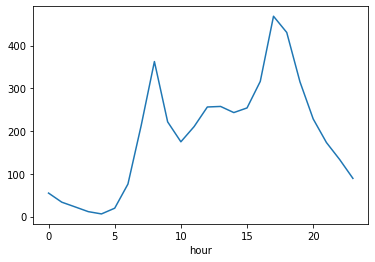

In [6]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

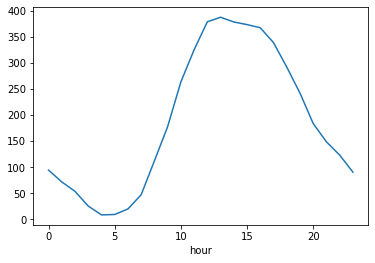

In [7]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
bikes1=bikes.copy()
bikes1.drop(bikes1.loc[bikes1['workingday']==1].index, inplace=True)
bikes1.groupby('hour').total.mean().plot()

# Esposible observar que en dias no laborales se tiene una demanda constante entre las 10 y las 17 horas aprox,
# se observara que en días laborales la distribucion de la demanda es distinta a esta 

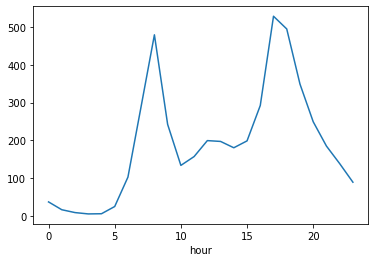

In [8]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
bikes2=bikes.copy()
bikes2.drop(bikes2.loc[bikes2['workingday']==0].index, inplace=True)
bikes2.groupby('hour').total.mean().plot()

# Es posible observar que en los dias laborales las horas de mayor demanda son aquellas fuera 
# de las que hacen parte del horario laboral habitual entre las 8 y 5 pm. los picos de demanda
# son temprano en la mañana y al final de la tarde e inicio de la noche

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [31]:
# Celda 3
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
X=bikes.loc[:,["hour","workingday"]]
y=bikes["total"]

regr = linear_model.LinearRegression()

regr.fit(X, y)

# coeficienetes obtenidos,
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)

print("Desempeño: " + str(regr.score(X,y)))

Coefficients: 
 [10.49206282  4.07248627]
Independent term: 
 67.7059502619161
Desempeño: 0.16059115011434855


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [10]:
# Celda 4


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de clasificación y compare desempeño con el modelo del punto 3.

(-11583.63076380749, 8)
Desempeño con profundidad 8: 0.6504671083410166


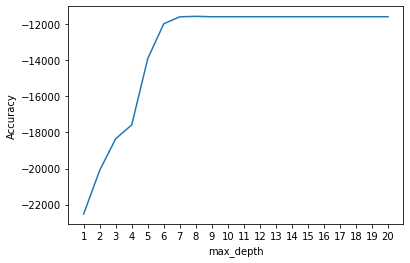

In [33]:
# Celda 5
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
max_depth_range = range(1, 21)

accuracy_scores = []

XTotal,yTotal=X,y

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

for depth in max_depth_range:
    arbol=DecisionTreeRegressor(max_depth=depth)
    accuracy_scores.append(cross_val_score(arbol, XTest, yTest, cv=10, scoring='neg_mean_squared_error').mean())
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(max_depth_range, accuracy_scores)
plt.xticks(range(1,21,1))
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

print(sorted(zip(accuracy_scores, max_depth_range))[::-1][0])


arbol=DecisionTreeRegressor(max_depth=8)
arbol.fit(XTrain,yTrain)
pred=arbol.predict(XTest)
precision=arbol.score(XTest,yTest)
print("Desempeño con profundidad 8: " + str(precision))

# Es posible oservar que el desempeño del arbol es mucho mejor frente a al resultado del modelo de regresion logística, dada
# su calibración

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [12]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [13]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [14]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [15]:
# Celda 6

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

# Regresion

regresion = linear_model.LogisticRegression()
regresion.fit(X_train,y_train)
prediccion=regresion.predict(X_test)
print("Accuracy regresion logistica: "+str(accuracy_score(y_test, prediccion)))

from sklearn.metrics import classification_report
# print(classification_report(y_test, prediccion))


#Arbol

from sklearn.tree import DecisionTreeClassifier

arbol=DecisionTreeClassifier()
arbol.fit(X_train,y_train)
pred=arbol.predict(X_test)
print("Accuracy Arbol: "+str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))

# Arbol calibrado

arbol=DecisionTreeClassifier(max_depth=4)
arbol.fit(X_train,y_train)
pred=arbol.predict(X_test)
print("Accuracy Arbol Calibrado: "+str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred))

Accuracy regresion logistica: 0.614
Accuracy Arbol: 0.5493333333333333
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       744
           1       0.55      0.55      0.55       756

    accuracy                           0.55      1500
   macro avg       0.55      0.55      0.55      1500
weighted avg       0.55      0.55      0.55      1500

Accuracy Arbol Calibrado: 0.6513333333333333
              precision    recall  f1-score   support

           0       0.63      0.70      0.67       744
           1       0.67      0.60      0.63       756

    accuracy                           0.65      1500
   macro avg       0.65      0.65      0.65      1500
weighted avg       0.65      0.65      0.65      1500



### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [22]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
# 100 árboles de decisión donde max_depth = None
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("100 árboles de decisión donde max_depth = None")
print("F1 Score: "+str(metrics.f1_score(y_pred, y_test))+" Accuracy: " + str(metrics.accuracy_score(y_pred, y_test)))
acc_1=metrics.accuracy_score(y_pred, y_test)
# 100 árboles de decisión donde max_depth = 2
clf_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_2.fit(X_train, y_train)
y_pred_2 = clf_2.predict(X_test)
print("100 árboles de decisión donde max_depth = 2")
print("F1 Score: "+str(metrics.f1_score(y_pred_2, y_test))+ " Accuracy: " + str(metrics.accuracy_score(y_pred_2, y_test)))
acc_2=metrics.accuracy_score(y_pred_2, y_test)
# 100 regresiones logísticas
lr=linear_model.LogisticRegression()
clf_3 = BaggingClassifier(base_estimator=lr, n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_3.fit(X_train, y_train)
y_pred_3 = clf_3.predict(X_test)

print("100 regresiones logísticas")
print("F1 Score: "+str(metrics.f1_score(y_pred_3, y_test)) + " Accuracy: " + str(metrics.accuracy_score(y_pred_3, y_test)))
acc_3=metrics.accuracy_score(y_pred_3, y_test)

100 árboles de decisión donde max_depth = None
F1 Score: 0.6675585284280936 Accuracy: 0.6686666666666666
100 árboles de decisión donde max_depth = 2
F1 Score: 0.6335403726708074 Accuracy: 0.646
100 regresiones logísticas
F1 Score: 0.6128813559322034 Accuracy: 0.6193333333333333


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [28]:
# Celda 8

# 100 árboles de decisión donde max_depth = None
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_4 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

print("100 árboles de decisión donde max_depth = None")
print("F1 Score: "+str(metrics.f1_score(y_pred_4, y_test))+" Accuracy: " + str(metrics.accuracy_score(y_pred_4, y_test)))
acc_4=metrics.accuracy_score(y_pred_4, y_test)
# 100 árboles de decisión donde max_depth = 2
clf_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 2), n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_2.fit(X_train, y_train)
y_pred_2 = clf_2.predict(X_test)

errors_2 = np.zeros(clf_2.n_estimators)
y_pred_all_2 = np.zeros((X_test.shape[0], clf_2.n_estimators))

for i in range(clf_2.n_estimators):
    oob_sample = ~clf_2.estimators_samples_[i]
    y_pred_ = clf_2.estimators_[i].predict(X_train.values[oob_sample])
    errors_2[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_2[:, i] = clf_2.estimators_[i].predict(X_test)
    
alpha_2 = (1 - errors_2) / (1 - errors_2).sum()
y_pred_5 = (np.sum(y_pred_all_2 * alpha_2, axis=1) >= 0.5).astype(np.int)

print("100 árboles de decisión donde max_depth = 2")
print("F1 Score: "+str(metrics.f1_score(y_pred_5, y_test))+ " Accuracy: " + str(metrics.accuracy_score(y_pred_5, y_test)))
acc_5=metrics.accuracy_score(y_pred_5, y_test)
# 100 regresiones logísticas
lr=linear_model.LogisticRegression()
clf_3 = BaggingClassifier(base_estimator=lr, n_estimators=100, max_samples=300, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf_3.fit(X_train, y_train)
y_pred_3 = clf_3.predict(X_test)

errors_3= np.zeros(clf_3.n_estimators)
y_pred_all_3 = np.zeros((X_test.shape[0], clf_3.n_estimators))

for i in range(clf_3.n_estimators):
    oob_sample = ~clf_3.estimators_samples_[i]
    y_pred_3 = clf_3.estimators_[i].predict(X_train.values[oob_sample])
    errors_3[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_3[:, i] = clf_3.estimators_[i].predict(X_test)
    
alpha_3 = (1 - errors_3) / (1 - errors_3).sum()
y_pred_6 = (np.sum(y_pred_all_3 * alpha_3, axis=1) >= 0.5).astype(np.int)

print("100 regresiones logísticas")
print("F1 Score: "+str(metrics.f1_score(y_pred_6, y_test)) + " Accuracy: " + str(metrics.accuracy_score(y_pred_6, y_test)))
acc_6=metrics.accuracy_score(y_pred_6, y_test)

100 árboles de decisión donde max_depth = None
F1 Score: 0.6715328467153284 Accuracy: 0.67
100 árboles de decisión donde max_depth = 2
F1 Score: 0.6347222222222222 Accuracy: 0.6493333333333333
100 regresiones logísticas
F1 Score: 0.6158001350438893 Accuracy: 0.6206666666666667


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

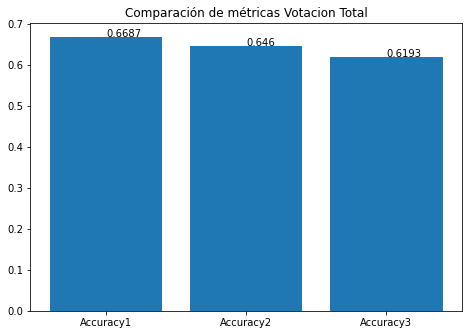

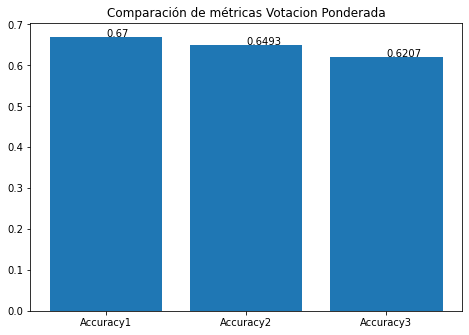

In [29]:
# Celda 9

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas Votacion Total")
ejeX = ['Accuracy1','Accuracy2','Accuracy3']
ejeY = [round(acc_1,4),round(acc_2,4),round(acc_3,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de métricas Votacion Ponderada")
ejeX = ['Accuracy1','Accuracy2','Accuracy3']
ejeY = [round(acc_4,4),round(acc_5,4),round(acc_6,4)]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

In [ ]:
# Es posibe observar que los modelos por votacion ponderada tienen un mejor desempeño frente a los de votación total.
# Bajo este panorama tambien es posible bservar que el modelo realizado sin ningun parametro deprofundidad alcanza
# mejores metricas, seguido por el arbol con profunidad 2 y finalmente en el último lugar encontramos el bagging
# con regresion logística.